<a href="https://colab.research.google.com/github/juhumkwon/DataMining/blob/main/6_2_One_Class_SVM(Decision_boundary_with_%F0%9D%9C%88).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

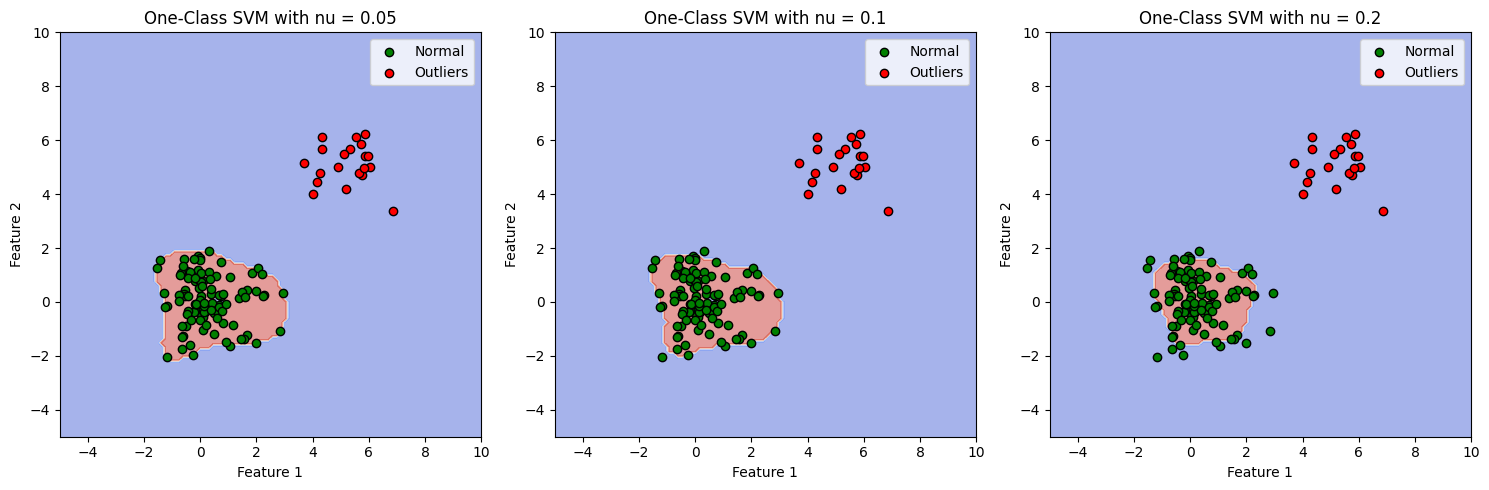

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# 정상 데이터 (예시로 2D 데이터 생성)
normal_data = np.random.randn(100, 2)

# 이상치 데이터 (정상 데이터와 다른 분포에서 생성)
outliers = np.random.randn(20, 2) + 5  # 정상 데이터에서 벗어난 값

# One-Class SVM 모델 생성 (RBF 커널 사용)
nu_values = [0.05, 0.1, 0.2]  # 𝜈 값을 다르게 설정하여 실험
plt.figure(figsize=(15, 5))

# 각 𝜈 값에 대해 모델 학습 및 시각화
for i, nu in enumerate(nu_values, start=1):
    model = OneClassSVM(nu=nu, kernel="rbf", gamma="auto")
    model.fit(normal_data)

    # 경계를 시각화할 x, y 값 생성
    xx, yy = np.meshgrid(np.linspace(-5, 10, 100), np.linspace(-5, 10, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 서브플롯
    plt.subplot(1, 3, i)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(normal_data[:, 0], normal_data[:, 1], c='green', label='Normal', edgecolors='k')
    plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Outliers', edgecolors='k')
    plt.title(f"One-Class SVM with nu = {nu}")
    plt.xlim(-5, 10)
    plt.ylim(-5, 10)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

plt.tight_layout()
plt.show()
